In [1]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np

# current_interpreter = sys.executable
# env_bin_path = os.path.dirname(current_interpreter)

# print(env_bin_path)

In [2]:
# os.environ['PATH'] = "/global/home/users/dixonluinenburg/.conda/envs/dimelo_modkit_3.11/bin:" + os.environ['PATH']
from dimelo import parse_bam
import pysam

PATH does not include the conda environment /bin folder. Adding /global/home/users/dixonluinenburg/.conda/envs/dimelo_modkit_3.11/bin.
PATH is now /global/home/users/dixonluinenburg/.conda/envs/dimelo_modkit_3.11/bin:/global/software/sl-7.x86_64/modules/langs/python/3.10/bin:/global/software/sl-7.x86_64/modules/tools/sq/0.1.0/bin:/global/software/sl-7.x86_64/modules/tools/emacs/25.1/bin:/global/software/sl-7.x86_64/modules/tools/vim/7.4/bin:/usr/local/bin:/bin:/usr/bin:/usr/local/sbin:/usr/sbin:/global/home/groups/allhands/bin:/global/home/users/dixonluinenburg/bin
modkit found with expected version 0.2.4


In [3]:
parse_bam.check_bam_format(
    '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.sorted.bam'
)

ValueError: Base modification tags are out of spec (Mm and Ml instead of MM and ML). 

Consider using "modkit update-tags /clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.sorted.bam new_file.bam" in the command line with your conda environment active and then trying with the new file. For megalodon basecalling/modcalling, you may also need to pass "--mode ambiguous"

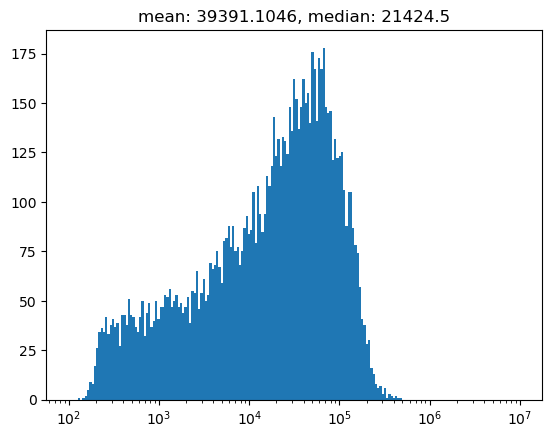

In [58]:
pangenome_bam = pysam.AlignmentFile('/clusterfs/nilah/oberon/datasets/pangenome/HG00408/nanopore/07_27_21_R941_HG00408_2_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass.bam','rb',check_sq=False)
lens_list = []
lim = 10000
for counter,read in enumerate(pangenome_bam):
    if counter>=lim:
        break
    lens_list.append(read.query_length)
bins = np.logspace(start=2,stop=7,num=200)
plt.hist(lens_list,bins=bins);
plt.title(f'mean: {np.mean(lens_list)}, median: {np.median(lens_list)}')
plt.xscale('log')

In [31]:
# !module load samtools && samtools view -H /clusterfs/nilah/oberon/datasets/pangenome/HG00408/nanopore/07_27_21_R941_HG00408_2_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass.bam

In [11]:
parse_bam.pileup(
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.retagged.ma.sorted.bam',
    output_name = 'bam_format_check',
    ref_genome = '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    region_str = 'chr1:990000-1000000',
    log = True,
    thresh = 128,
    cleanup=False,
)

No output directory provided, using input directory /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context
Logging to  /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/pileup-log
No specified number of cores requested. 32 available on machine, allocating 16
Modification threshold of 128 assumed to be for range 0-255. 128/255=0.5019607843137255 will be sent to modkit.


> parsing region chr1:990000-1000000
> parsed user-input threshold 0.5019608 for mod-code Y
> parsed user-input threshold 0.5019608 for mod-code m
> parsed user-input threshold 0.5019608 for mod-code Z
> parsed user-input threshold 0.5019608 for mod-code a
> calculated chunk size: 24, interval size 100000, processing 2400000 positions concurrently
> Threshold of 0.5019608 for mod code Y is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Threshold of 0.5019608 for mod code m is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Threshold of 0.5019608 for mod code Z is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Threshold of 0.5019608 for mod code a is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Done, processed 4166 rows. Processed ~4 reads and skipped zero reads.


PosixPath('/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/pileup.sorted.bed.gz')

In [12]:
parse_bam.extract(
    '/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/mod_mappings.01.retagged.ma.sorted.bam',
    output_name = 'bam_format_check',
    ref_genome = '/clusterfs/nilah/oberon/genomes/chm13.draft_v1.1.fasta',
    region_str = 'chr1:990000-1000000',
    log = True,
    thresh = 128,
    cleanup=False,
)

No output directory provided, using input directory /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context
No specified number of cores requested. 32 available on machine, allocating 16
Modification threshold of 128 assumed to be for range 0-255. 128/255=0.5019607843137255 will be sent to modkit.
Extracting A,0 sites
logging to  /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/extract-log


> specifying a motif (including --cpg) outputs only mapped sites
> found BAM index, processing reads in 100000 base pair chunks
> processed 4 reads, 17817 rows, skipped ~0 reads, failed ~0 reads


Adding A,0 to /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/reads.combined_basemods.h5
4 reads found in /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/reads.A,0.txt
Extracting CG,0 sites
logging to  /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/extract-log


> specifying a motif (including --cpg) outputs only mapped sites
> found BAM index, processing reads in 100000 base pair chunks
> processed 4 reads, 2416 rows, skipped ~0 reads, failed ~0 reads


Adding CG,0 to /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/reads.combined_basemods.h5
4 reads found in /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/reads.CG,0.txt
extending from 4 to 8
Extracting GCH,1 sites
logging to  /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/extract-log


> specifying a motif (including --cpg) outputs only mapped sites
> found BAM index, processing reads in 100000 base pair chunks
> processed 4 reads, 4368 rows, skipped ~0 reads, failed ~0 reads


Adding GCH,1 to /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/reads.combined_basemods.h5
4 reads found in /clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/reads.GCH,1.txt
extending from 8 to 12


PosixPath('/clusterfs/nilah/oberon/datasets/dimelo_mA-mGpC/20230702_jm_lmnb1_acessibility_redux/megalodon_all_context/bam_format_check/reads.combined_basemods.h5')

In [3]:
parse_bam.check_bam_format(
    '/clusterfs/nilah/oberon/datasets/pangenome/HG00408/nanopore/07_27_21_R941_HG00408_2_Guppy_6.5.7_450bps_modbases_5mc_cg_sup_prom_pass.bam'
)

ValueError: file has no sequences defined (mode='r') - is it SAM/BAM format? Consider opening with check_sq=False

In [4]:
parse_bam.check_bam_format(
    '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.sorted.bam'
)

In [10]:
parse_bam.check_bam_format(
    '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/deep_ctcf_mod_mappings_merge.retagged.ma.sorted.bam'
)

TypeError: check_bam_format() got an unexpected keyword argument 'output_name'

In [6]:
parse_bam.pileup(
    input_file = '/clusterfs/nilah/oberon/cd55_cas9/cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam',
    output_name = 'bam_format_check',
    ref_genome = '/clusterfs/nilah/oberon/dimelo_dev_source/test_inputs/genomes/chm13.draft_v1.0.fasta',
    region_str = 'chr1:0-1000000',
    log = True,
    thresh = 128
)


Consider passing only the basemods that you expect to be present in your file.
No output directory provided, using input directory /clusterfs/nilah/oberon/cd55_cas9
Logging to  /clusterfs/nilah/oberon/cd55_cas9/bam_format_check/pileup-log
No specified number of cores requested. 32 available on machine, allocating 16
Modification threshold of 128 assumed to be for range 0-255. 128/255=0.5019607843137255 will be sent to modkit.


> parsing region chr1:0-1000000
> parsed user-input threshold 0.5019608 for mod-code Z
> parsed user-input threshold 0.5019608 for mod-code a
> parsed user-input threshold 0.5019608 for mod-code Y
> parsed user-input threshold 0.5019608 for mod-code m
> calculated chunk size: 24, interval size 100000, processing 2400000 positions concurrently
> Threshold of 0.5019608 for mod code Z is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Threshold of 0.5019608 for mod code a is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Threshold of 0.5019608 for mod code Y is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Threshold of 0.5019608 for mod code m is very low. Consider increasing the filter-percentile or specifying a higher threshold.
> Done, processed 30961 rows. Processed ~106 reads and skipped zero reads.


PosixPath('/clusterfs/nilah/oberon/cd55_cas9/bam_format_check/pileup.sorted.bed.gz')

In [3]:
parse_bam.check_bam_format(
'/clusterfs/nilah/oberon/cd55_cas9/cas9_12ef_101923_misha_mod_mappings.retagged.sorted_mC_only.bam')


Consider passing only the basemods that you expect to be present in your file.
